In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from google.colab import files
files.upload()

Saving Chapter4_PE_Income_Spending_DataSet.csv to Chapter4_PE_Income_Spending_DataSet.csv


{'Chapter4_PE_Income_Spending_DataSet.csv': b'Petroleum_Engineer_Gender,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100)\r\nMale,19,34.67635403,37.05\r\nMale,21,34.67635403,76.95\r\nFemale,20,36.98811096,5.7\r\nFemale,23,36.98811096,73.15\r\nFemale,31,39.2998679,38\r\nFemale,22,39.2998679,72.2\r\nFemale,35,41.61162483,5.7\r\nFemale,23,41.61162483,89.3\r\nMale,64,43.92338177,2.85\r\nFemale,30,43.92338177,68.4\r\nMale,67,43.92338177,13.3\r\nFemale,35,43.92338177,94.05\r\nFemale,58,46.23513871,14.25\r\nFemale,24,46.23513871,73.15\r\nMale,37,46.23513871,12.35\r\nMale,22,46.23513871,75.05\r\nFemale,35,48.54689564,33.25\r\nMale,20,48.54689564,62.7\r\nMale,52,53.17040951,27.55\r\nFemale,35,53.17040951,93.1\r\nMale,35,55.48216645,33.25\r\nMale,25,55.48216645,69.35\r\nFemale,46,57.79392338,4.75\r\nMale,31,57.79392338,69.35\r\nFemale,54,64.72919419,13.3\r\nMale,29,64.72919419,77.9\r\nFemale,45,64.72919419,30.4\r\nMale,35,64.72919419,57.95\r\nFemale,40,67.0409

In [3]:
df=pd.read_csv('Chapter4_PE_Income_Spending_DataSet.csv')
df.head()

,Petroleum_Engineer_Gender,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100)
0,Male,19,34.676354,37.05
1,Male,21,34.676354,76.95
2,Female,20,36.988111,5.70
3,Female,23,36.988111,73.15
4,Female,31,39.299868,38.00


In [4]:
#use this to split the gender, and i need only one gender 
dfm=pd.get_dummies(df, drop_first=True)
dfm.head()

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male
0,19,34.676354,37.05,1
1,21,34.676354,76.95,1
2,20,36.988111,5.70,0
3,23,36.988111,73.15,0
4,31,39.299868,38.00,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


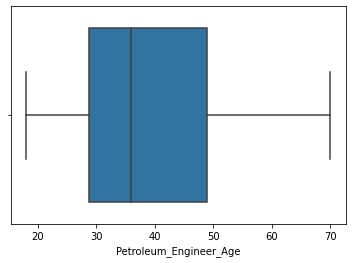

In [5]:

sns.boxplot(dfm['Petroleum_Engineer_Age'])



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


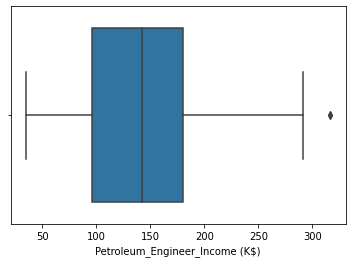

In [6]:
sns.boxplot(dfm['Petroleum_Engineer_Income (K$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


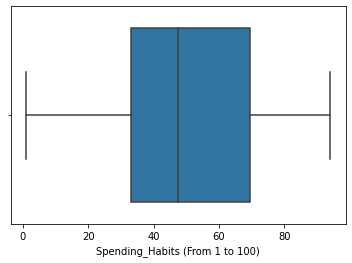

In [7]:

sns.boxplot(dfm['Spending_Habits (From 1 to 100)'])

In [8]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples=200, contamination=0.1)
clf.fit(dfm)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.1, max_samples=200)

(array([ 2.,  2.,  8., 10., 15., 33., 41., 38., 33., 18.]),
 array([-0.08754387, -0.06513495, -0.04272604, -0.02031713,  0.00209179,
         0.0245007 ,  0.04690962,  0.06931853,  0.09172744,  0.11413636,
         0.13654527]),
 <a list of 10 Patch objects>)

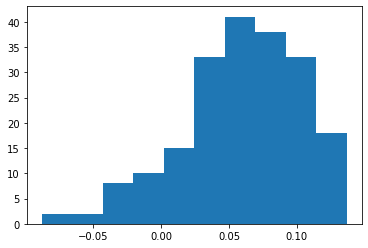

In [9]:
dfm['scores']=clf.decision_function(dfm)
plt.hist(dfm['scores'])

In [10]:
dfm.head()

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male,scores
0,19,34.676354,37.05,1,-0.014621
1,21,34.676354,76.95,1,0.007452
2,20,36.988111,5.70,0,-0.050423
3,23,36.988111,73.15,0,0.041596
4,31,39.299868,38.00,0,0.052340


In [12]:
#we use the prediction for the other columns and not the whole dataframe and scores
dfm['anomaly']=clf.predict(dfm.iloc[:, :4])
dfm.head()

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male,scores,anomaly
0,19,34.676354,37.05,1,-0.014621,-1
1,21,34.676354,76.95,1,0.007452,1
2,20,36.988111,5.70,0,-0.050423,-1
3,23,36.988111,73.15,0,0.041596,1
4,31,39.299868,38.00,0,0.052340,1


In [16]:
#here, the anomalies were stated in the table
Anomaly=dfm.loc[dfm['anomaly']==-1]
Anomaly

,Petroleum_Engineer_Age,Petroleum_Engineer_Income (K$),Spending_Habits (From 1 to 100),Petroleum_Engineer_Gender_Male,scores,anomaly
0,19,34.676354,37.05,1,-0.014621,-1
2,20,36.988111,5.70,0,-0.050423,-1
7,23,41.611625,89.30,0,-0.007514,-1
8,64,43.923382,2.85,1,-0.032816,-1
10,67,43.923382,13.30,1,-0.053592,-1
11,35,43.923382,94.05,0,-0.023102,-1
12,58,46.235139,14.25,0,-0.001274,-1
19,35,53.170410,93.10,0,-0.014238,-1
33,18,76.287979,87.40,1,-0.020581,-1
140,57,173.381770,4.75,0,-0.010357,-1


In [17]:
#to list the indexes, which will be easier that fetching in the table
anomally=list(Anomaly.index)
anomally

[0,
 2,
 7,
 8,
 10,
 11,
 12,
 19,
 33,
 140,
 178,
 185,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199]

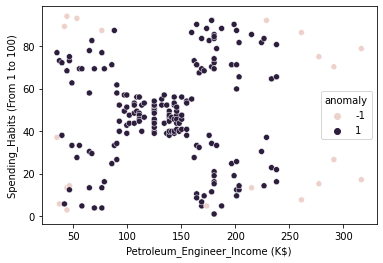

In [19]:
#to visualize using seaborn
sns.scatterplot(x=dfm['Petroleum_Engineer_Income (K$)'], y=dfm['Spending_Habits (From 1 to 100)'], hue=dfm['anomaly'])

In [34]:
#to visualize using plotly
import plotly.express as px
px.scatter(dfm, x=dfm['Petroleum_Engineer_Income (K$)'], y=dfm['Spending_Habits (From 1 to 100)'],color=dfm['anomaly'])

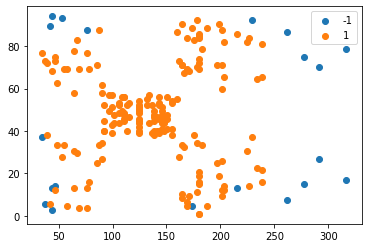

In [44]:
#to visualize using matplotlib

Group=dfm.groupby(by='anomaly')
for i,j in Group:
  plt.scatter(j['Petroleum_Engineer_Income (K$)'], j['Spending_Habits (From 1 to 100)'], label=i)
  plt.legend()

